# Project Big Data Analytics


## Team members: 
### Aitore Issadykova
###  Assem Kussainova

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as r2



# Loading Dataset


In [2]:
#load_dataset
train = pd.read_csv('bda-image-challenge-train.txt', header = None)
print(np.shape(train))


(9200, 1024)


In [3]:
train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
np.max(x)

1.0

In [4]:
image = train.values.reshape(9200, 32, 32)
n = len(image)

y = image[:, 8:24, 8:24].reshape(n, -1)
x = image.copy()

x[:, 8:24, 8:24] = 0
x = x.reshape(n, -1)

print(x.shape)
print(y.shape)

(9200, 1024)
(9200, 256)


# Loading Training Data

In [5]:
test = pd.read_csv("bda-image-challenge-row-testdist.txt", header=None)
print(np.shape(test))
print(test)

(920, 1025)
     0     1     2     3     4     5     6     7     8     9     ...  1015  \
0       1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
915   916   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
916   917   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
917   918   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
918   919   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
919   920   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     1016  1017  1018  1019  1020  1021  1022  1023

In [6]:
image_test = test.values[:, 1:]
image_test=image_test.reshape(920, 32, 32)
n1 = len(image_test)
print(image_test.shape)

(920, 32, 32)


In [7]:
y_test = image_test[:, 8:24, 8:24].reshape(n1, -1)
x_test = image_test.copy()

x_test = x_test.reshape(n1, -1)

print(x_test.shape)
print(y_test.shape)

(920, 1024)
(920, 256)


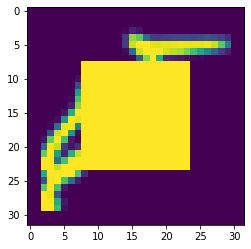

In [8]:
im1 = x_test[20].reshape(32, 32)
im1[8:24, 8:24] = y_test[520].reshape(16, 16)
plt.imshow(im1.reshape(32, 32))
plt.show()

# Keras model with kfold cross-validation

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, ZeroPadding2D, Dropout
from sklearn.model_selection import KFold


Using TensorFlow backend.


In [10]:
def kerasmodel():
    
    # Initialize model
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=(32, 32, 1),
        padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(512, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(3072))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(256))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    
    alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return alexnet

In [12]:
n_split=4
 
for train_index,test_index in KFold(n_split).split(x):
    x_trker,x_ttker=x[train_index],x[test_index]
    y_trker,y_ttker=y[train_index],y[test_index]
    ntr=len(x_trker)
    ntt=len(x_ttker)
    x_trker,y_trker =x_trker.reshape(ntr, 32, 32,1),y_trker.reshape(ntr, 256) 
    x_ttker,y_ttker =x_ttker.reshape(ntt, 32, 32,1),y_ttker.reshape(ntt, 256) 
    print(x_trker.shape,y_trker.shape )
    kermodel=kerasmodel()
    kermodel.fit( x_trker, y_trker,epochs=4)
    print('Model evaluation ',kermodel.evaluate(x_ttker,y_ttker))



(6900, 32, 32, 1) (6900, 256)
Epoch 1/4
6900/6900 [==============================] - 896s 130ms/step - loss: 500.7929 - accuracy: 0.0136
Epoch 2/4
6900/6900 [==============================] - 910s 132ms/step - loss: 495.8829 - accuracy: 0.0200
Epoch 3/4
6900/6900 [==============================] - 2035s 295ms/step - loss: 500.2361 - accuracy: 0.0207
Epoch 4/4
2300/2300 [==============================] - 111s 48ms/step
Model evaluation  [537.6905893873131, 0.048695653676986694]
(6900, 32, 32, 1) (6900, 256)
Epoch 1/4
6900/6900 [==============================] - 954s 138ms/step - loss: 511.2437 - accuracy: 0.0065
Epoch 2/4
6900/6900 [==============================] - 949s 138ms/step - loss: 504.9309 - accuracy: 0.0103
Epoch 3/4
6900/6900 [==============================] - 945s 137ms/step - loss: 510.7198 - accuracy: 0.0123
Epoch 4/4
2300/2300 [==============================] - 111s 48ms/step
Model evaluation  [560.8814009956692, 0.009130435064435005]
(6900, 32, 32, 1) (6900, 256)
Epoch 1

In [13]:
y_pred= kermodel.predict(x.reshape(n,32,32,1))
print("Keras: ")
print("MSE: ",mean_squared_error(y, y_pred))
print("R2-score: ",r2(y, y_pred))



Keras: 
MSE:  0.2955869710999425
R2-score:  -0.6616296792525809


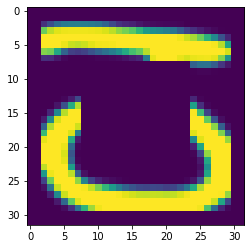

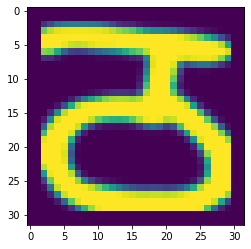

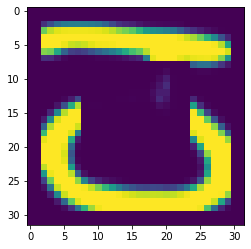

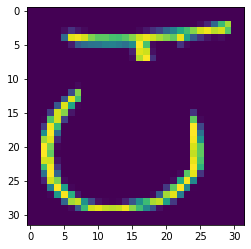

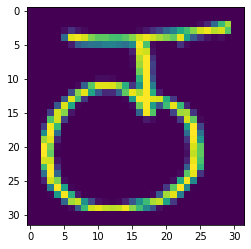

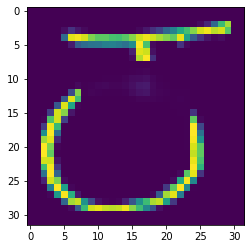

In [15]:
for i in range(2):
    im1 = x[30+i].reshape(32, 32)
    im2 = im1.copy()
    im3=im1.copy()
    im1[8:24, 8:24] = y[30+i].reshape(16, 16)
    im2[8:24, 8:24] = y_pred[30+i].reshape(16, 16)
    plt.imshow(im3.reshape(32, 32))
    plt.show()
    plt.imshow(im1.reshape(32, 32))
    plt.show()
    plt.imshow(im2.reshape(32, 32))
    plt.show()

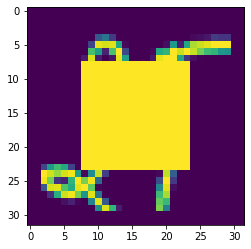

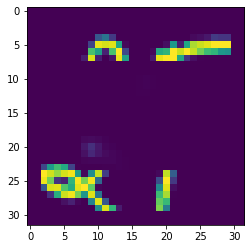

In [16]:
im1 = x_test[520].reshape(32, 32)
im2 = im1.copy()
im1[8:24, 8:24] = y_test[520].reshape(16, 16)
im2[8:24, 8:24] = y_pred[520].reshape(16, 16)
plt.imshow(im1.reshape(32, 32))
plt.show()
plt.imshow(im2.reshape(32, 32))
plt.show()

In [20]:
len(kermodel.layers)

7